In [57]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

UNSUALRATIO=1


In [58]:
#add_days
from datetime import datetime, timedelta

def add_day(date, days):
    lastday=datetime.strptime(date, '%Y-%m-%d')
    return (lastday+timedelta(days=days)).strftime('%Y-%m-%d')



In [59]:
#getdata


# datadata1 = [1.764052345967664, 0.4001572083672233, 0.9787379841057392, 2.240893199201458, 1.8675579901499675, 0.977277879876411, 0.9500884175255894, 0.1513572082976979, 0.10321885179355784, 0.41059850193837233, 0.144043571160878, 1.454273506962975, 0.7610377251469934, 0.12167501649282841, 0.44386323274542566, 0.33367432737426683, 1.4940790731576061, 0.20515826376580087, 0.31306770165090136, 0.8540957393017248, 2.5529898158340787, 0.6536185954403606, 0.8644361988595057, 0.7421650204064419, 2.2697546239876076, 1.4543656745987648, 0.04575851730144607, 0.1871838500258336, 1.5327792143584575, 1.469358769900285]

# datadata2 = [2.4444900454649066, 1.2114583477420486, 1.5722444651970389, 3.849659317044043, 2.9795201838121526, 1.8192034039105907, 1.4303826366487944, 1.1199710593994645, 0.21828432404214673, 0.8168924346299092, 1.1576407052694442, 1.5075307298732392, 0.5063140884776233, 0.6672108788182483, 0.07923314656105851, 1.4723220838860467, 2.0343091193565352, 0.0659900100716776, 1.4310725657165444, 2.021401004669799, 4.763264203964403, 1.4334502222982335, 0.8660414557619074, 2.0682800071591796, 3.2706302505057216, 2.5827767097963448, 0.5422637598390431, 0.2032707284933333, 2.6062085067107263, 2.6651414906336908]

name1="BITO_stock"
name2="IBIT_stock"
file1="/home/eric/Desktop/code/BTC_data_analyzation/datas/"+name1+"_data.csv"
file2="/home/eric/Desktop/code/BTC_data_analyzation/datas/"+name2+"_data.csv"
datadata1=pd.read_csv(file1)
datadata2=pd.read_csv(file2)
datadata1=datadata1["Open"].tolist()
datadata2=datadata2["Open"].tolist()
data1= pd.Series(datadata1).pct_change().tolist()
data2= pd.Series(datadata2).pct_change().tolist()
data1.remove(data1[0])
data2.remove(data2[0])
data1.reverse()
data2.reverse()
lenmin=min(len(data1),len(data2))
data1=data1[:lenmin]
data2=data2[:lenmin]
data1.reverse()
data2.reverse()
st="2024-01-11"
et="2025-01-14"

# print(data1)
# print(data2)


相关性系数： 0.9988589272659745


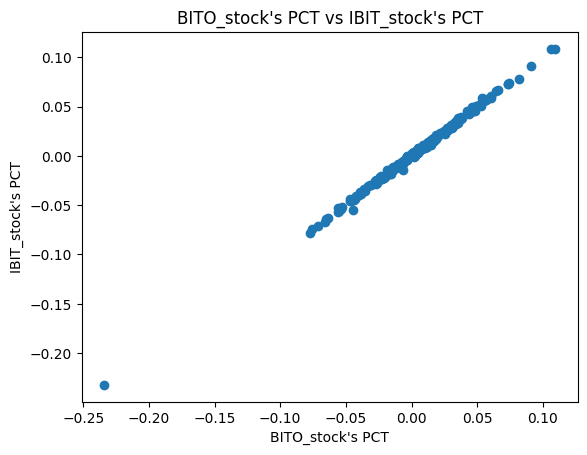

Pearson 相关性系数： 0.9988589272659738
p 值： 0.0
Spearman 等级相关性系数： 0.9976049107580856
p 值： 4.813722234208482e-292


In [60]:

def Method1():
    # 定义两组数据
    np.random.seed(0)
    BITO = data1
    BTC = data2 

    # 计算相关性
    correlation_coef = np.corrcoef(BITO, BTC)[0, 1]
    print("相关性系数：", correlation_coef)

    # 绘制散点图
    plt.scatter(BITO, BTC)
    plt.xlabel(name1+"'s PCT")
    plt.ylabel(name2+"'s PCT")
    plt.title(name1+"'s PCT vs "+name2+"'s PCT")
    plt.show()

    # 计算 pearson 相关性
    from scipy.stats import pearsonr
    pearson_coef, p_value = pearsonr(BITO, BTC)
    print("Pearson 相关性系数：", pearson_coef)
    print("p 值：", p_value)

    # 计算 spearman 等级相关性
    from scipy.stats import spearmanr
    spearman_coef, p_value = spearmanr(BITO, BTC)
    print("Spearman 等级相关性系数：", spearman_coef)
    print("p 值：", p_value)

Method1()

In [61]:
#绘制pct直方图
def Method2():
    import numpy as np
    import matplotlib.pyplot as plt

    # 假设X和Y是两组数据
    x = np.array(data1)
    y = np.array(data2)

    # 绘制直方图
    plt.hist([x, y], alpha=0.5, label=[name1+"'s PCT", name2+"'s PCT"])

    plt.legend()
    plt.show()


In [62]:
#提取异常数据

def my_abs(x):
    if x<0:
        return -x
    else:
        return x

def Method3():
    len11= len(data1)
    unusualList=[]
    for i in range(len11):
        
        if my_abs(data1[i]-data2[i])>UNSUALRATIO:
            t=[i,add_day(st,i),data1[i],data2[i]]
            unusualList.append(t)
            
    print(unusualList)
    return unusualList
    
unusualList=Method3()
    

[]


In [63]:
import numpy as np
import matplotlib.pyplot as plt

def DrawMethod3():
    # 假设X和Y是两组数据
    x = np.array([i[2] for i in unusualList])
    y = np.array([i[3] for i in unusualList])

        # 绘制直方图
    plt.hist([x, y], alpha=0.5, label=[name1+"'s PCT", name2+"'s PCT"])
    plt.title("Unusual PCT")
    plt.legend()
    plt.show()

相关性系数： 0.9988589272659745


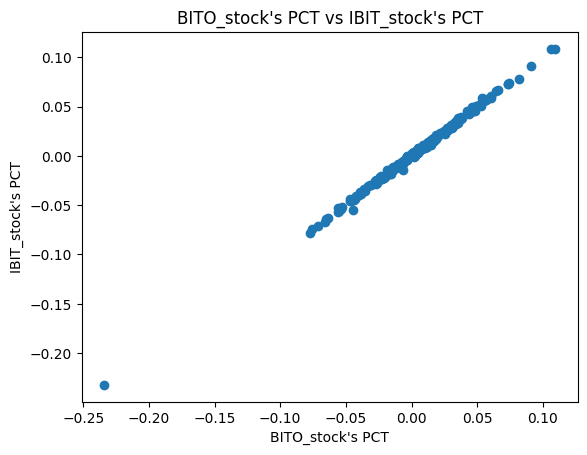

Pearson 相关性系数： 0.9988589272659738
p 值： 0.0
Spearman 等级相关性系数： 0.9976049107580856
p 值： 4.813722234208482e-292


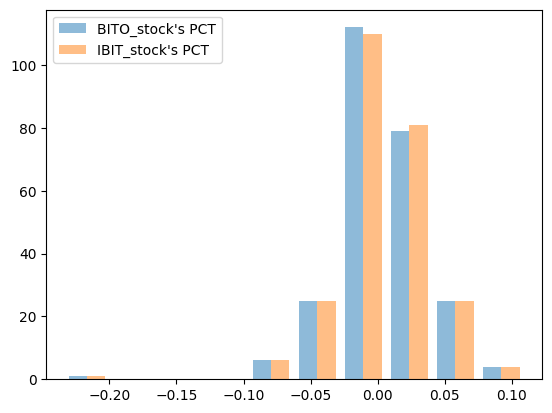

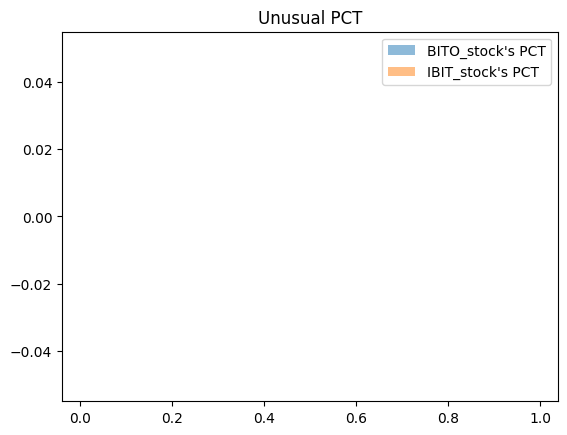

In [64]:
Method1()
Method2()
DrawMethod3()
